## Alter distance metrics

In [1]:
%matplotlib inline 
import pandas as pd
import openensembles as oe
import numpy as np
import re
import sklearn as sk
import sklearn.cluster as skc



## Generate Half Rings points.
halfRings = []
while(True):
    x = np.random.normal(0,20)
    y = np.random.normal(0,20)
    z = np.random.normal(0,20)
    if ((x ** 2 + y ** 2) >= 0.5) and ((x ** 2 + y ** 2) <= 1):
        halfRings.append(list([x,y]))
    elif ((x ** 2 + y ** 2) >= 10) and ((x ** 2 + y ** 2) <= 11):
        halfRings.append(list([x,y]))
        
    if len(halfRings) == 400:
        break

halfRings = np.asarray(halfRings)
df = pd.DataFrame(halfRings)
#create an open ensembles data object from the dataframe
dataObj = oe.data(df, [1,2])

In [2]:
c = oe.cluster(dataObj)

In [3]:
c.algorithms_available()

{'AffinityPropagation': '',
 'DBSCAN': '',
 'agglomerative': '',
 'kmeans': '',
 'spectral': ''}

In [4]:
algorithms_wDist = ['agglomerative', 'DBSCAN', 'AffinityPropagation']
algorithms_noDist = ['kmeans', 'spectral']

In [5]:
# Create an ensemble of those that can take distance, for all distances
dDict = sk.metrics.pairwise.distance_metrics()
#remove precomputed from dictionary of distances
del dDict['precomputed']
dDict

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances>}

In [6]:
#PREFORM ensemble clustering 
c = oe.cluster(dataObj)

K = [2]

#AP does not handle K, so keep that in outer loop
for distance in dDict:
    for algorithm in algorithms_wDist:
        if algorithm=='AffinityPropagation' or algorithm=='DBSCAN':
            c.cluster(transform, algorithm, name, distance=distance)
        else:
            for k in K:
                for transform in list(dataObj.D.keys()):
                    name = "%s_%d_%s_%s"%(algorithm, k, transform, distance)
                    if algorithm=='agglomerative': #can't perform distance calculation on ward, which is default linkage
                        c.cluster(transform, algorithm, name, K=k, distance=distance, linkage='complete')
                    else:
                        c.cluster(transform, algorithm, name, K=k, distance=distance)

/Users/knaegle/GIT/openensembles.main/openensembles.py:237: UserWarning: For uniqueness, altered output_name to be agglomerative_2_parent_manhattan_8286
  warnings.warn('For uniqueness, altered output_name to be %s'%(output_name), UserWarning)
/Users/knaegle/GIT/openensembles.main/openensembles.py:253: UserWarning: Number of unique clusters 3 returned does not match number requested 2 for solution: agglomerative_2_parent_manhattan_8286
  warnings.warn("Number of unique clusters %d returned does not match number requested %d for solution: %s"%(len(uniqueClusters), K, output_name), UserWarning)
/Users/knaegle/GIT/openensembles.main/openensembles.py:237: UserWarning: For uniqueness, altered output_name to be agglomerative_2_parent_manhattan_2546
  warnings.warn('For uniqueness, altered output_name to be %s'%(output_name), UserWarning)
/Users/knaegle/GIT/openensembles.main/openensembles.py:253: UserWarning: Number of unique clusters 4 returned does not match number requested 2 for solution

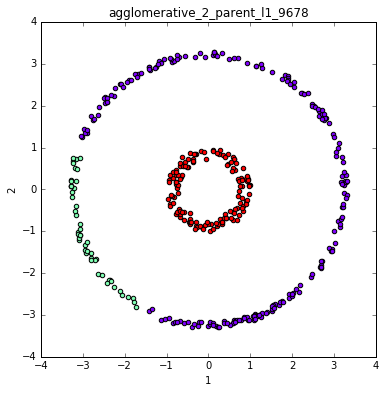

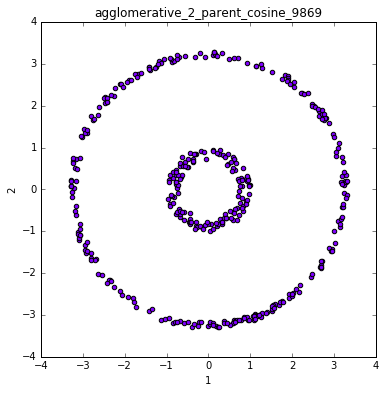

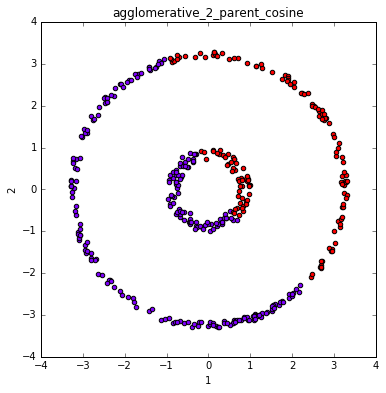

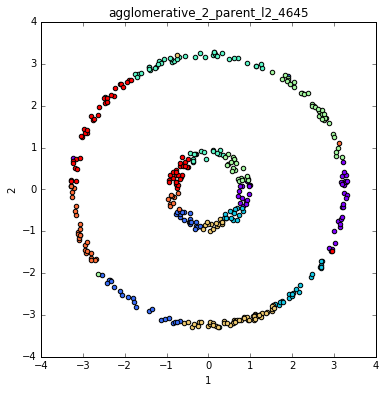

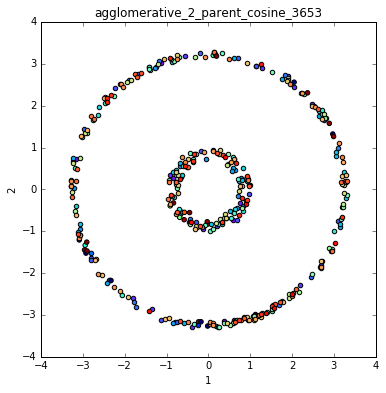

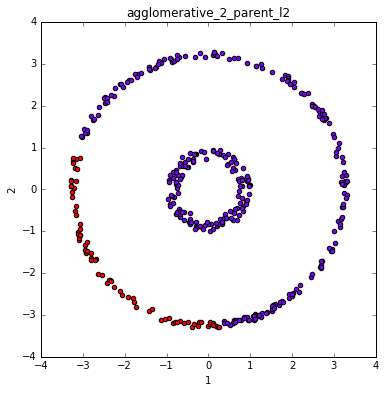

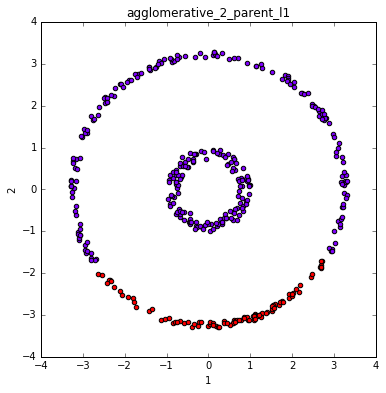

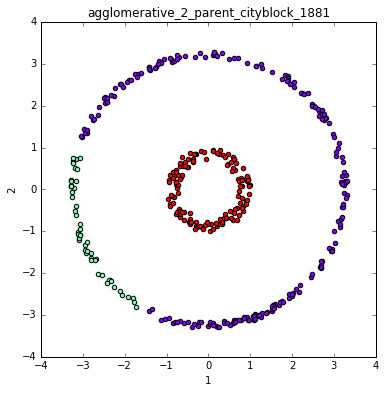

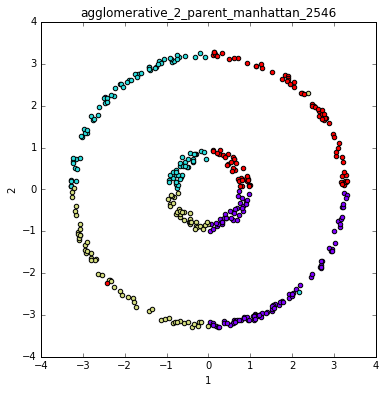

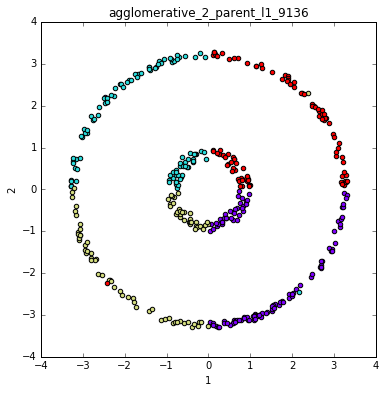

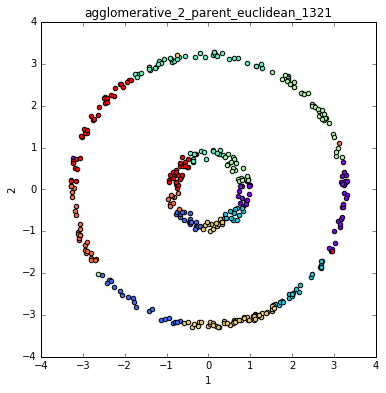

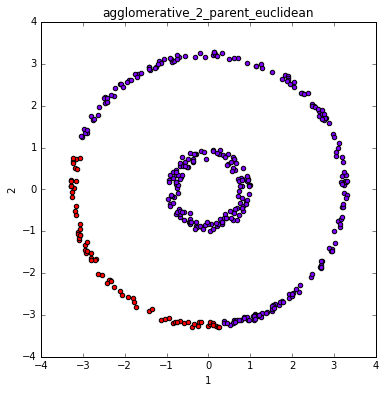

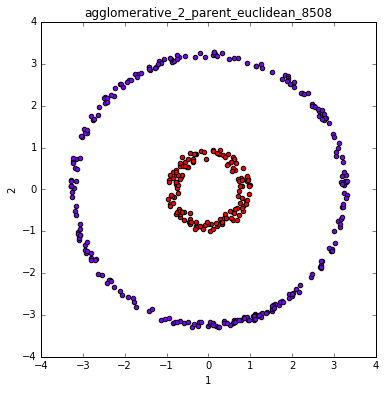

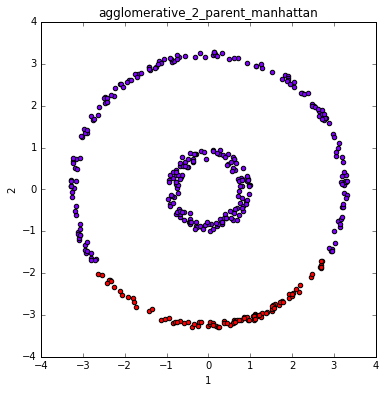

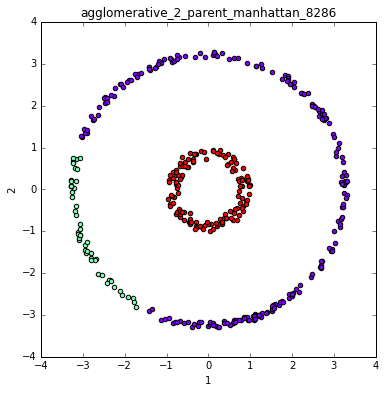

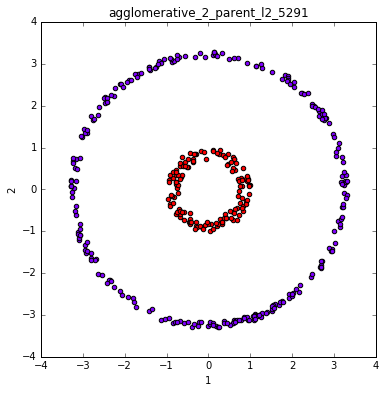

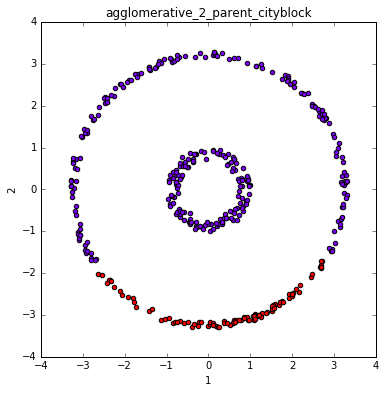

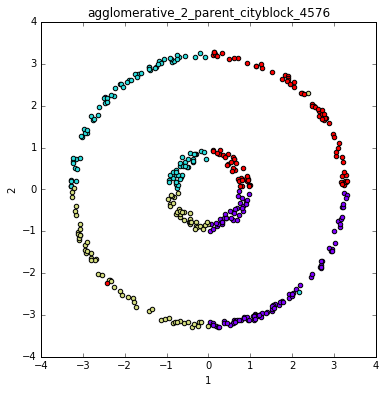

In [7]:
## Plot individual clustering solutions in the ensemble clustering object

fignum = 1
fig = {}
for solution in c.labels:
    labels = c.labels[solution]
    fig[solution] = dataObj.plot_data('parent', fignum=fignum, title=solution, class_labels=labels)
    fignum += 1


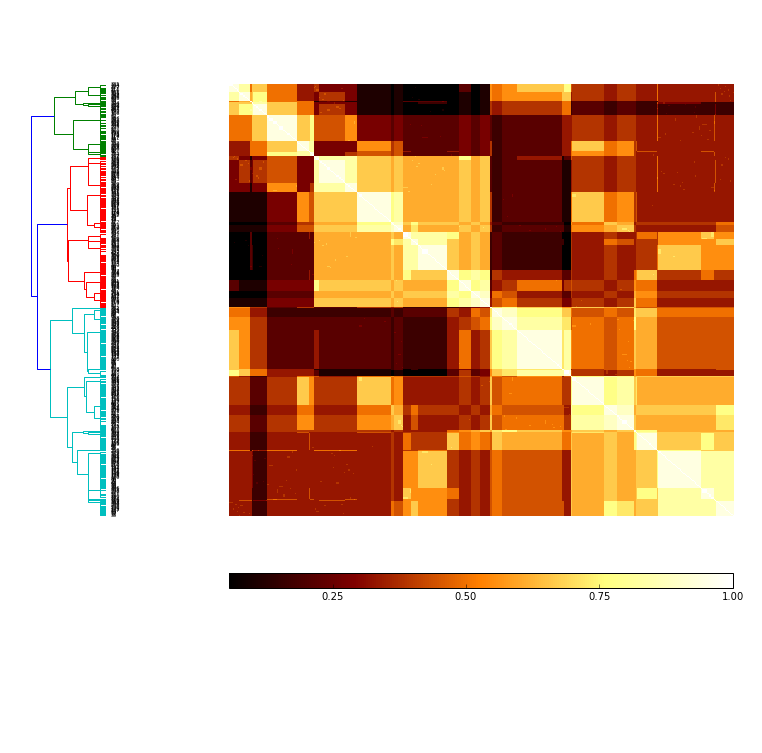

In [8]:
##########################################################
# Ensemble Finishing By Linking The Co-occurrence matrix #
##########################################################
#plot the co-occurrence matrix, not necessary, but for visualization

coMat = c.co_occurrence_matrix('parent')
threshold = coMat.avg_dist
coMat.plot()
c_linkage = c.finish_co_occ_linkage(threshold, linkage='average')